In [1]:
#Shishir Khanal
# July 12, 2025
# Dynamic Time Warping

In [3]:
import numpy as np
import scipy.spatial.distance as dist
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch

In [6]:
# Define DTW function

def dtw(x,y):
    
    #Shape of input series to shape cost matrix
    N = x.shape[0]
    M = y.shape[0]
    #calculate distance
    distance_matrix  = np.zeros((N,M))

    for i in range(N):
        for j in range(M):
            distance_matrix[i,j] = abs(x[i] - y[j])
    
    #Init matrix with extra row and extra column
    cost_matrix = np.zeros((N+1, M+1))

    #Fill extra row and col with inf
    #Bottom left entry left at 0
    for i in range(1, N+1):
        cost_matrix[i,0] = np.inf
    for i in range(1, M+1):
        cost_matrix[0,i] = np.inf   
    
    #Init empty matrix to store path origin
    traceback_matrix = np.zeros((N, M))

   # Loop to fill cost matrix
    for i in range(N):
        for j in range(M):
            penalty = [
                cost_matrix[i,j],
                cost_matrix[i,j+1],
                cost_matrix[i+1,j]
            ]
            #Get the min of penalty list
            min_penalty_index = np.argmin(penalty)
            #Add penalty to distance
            cost_matrix[i+1,j+1] = distance_matrix[i,j] + penalty[min_penalty_index]

            # Record origin of min penalty
            traceback_matrix[i,j] = min_penalty_index

    #Get path
    i = N - 1
    j = M - 1

    path = [(i,j)]

    while i>0 or j > 0:
        penalty_type = traceback_matrix[i,j]

        if penalty_type  == 0:
            i = i-1
            j = j-1
        elif penalty_type == 1:
            i = i-1
        elif penalty_type == 2:
            j = j-1
        path.append((i,j))

    #Remove extra row and column
    cost_matrix = cost_matrix[1:, 1:]
    alignment_cost = cost_matrix[N-1, M-1]
    normalized_alignment_cost = cost_matrix[N-1, M-1]/(N+M)
    #Return cost matrix and path
    return(
        cost_matrix,
        path[::-1],
        alignment_cost,
        normalized_alignment_cost
    )

In [8]:
#Test DTW
x = np.array([1, 0, 0, 1])
y = np.array([1, 0, 0, 0.5, 1])

cost_mat, path, cost, noprm_cost = dtw(x,y)

print(f"Alignment cost: {cost}")

Alignment cost: 0.5


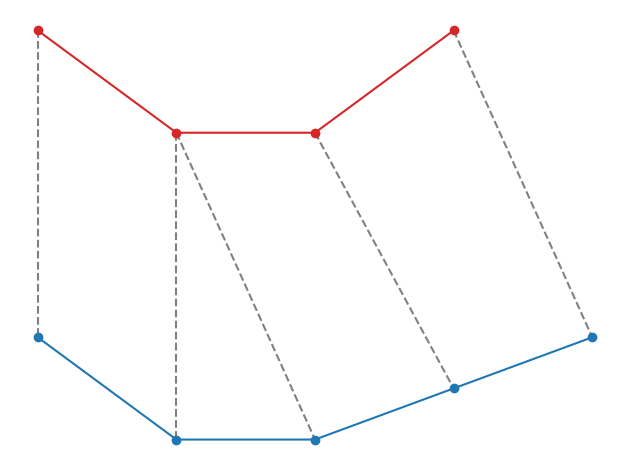

In [10]:
fig, ax = plt.subplots()

for x_i,y_j in path:
    ax.plot([x_i, y_j], [x[x_i] + 1.5, y[y_j] - 1.5], color="gray", ls='--')
ax.plot(np.arange(x.shape[0]), x + 1.5, "-o", c="C3")
ax.plot(np.arange(y.shape[0]), y - 1.5, "-o", c="C0")

plt.axis("off")
plt.tight_layout()

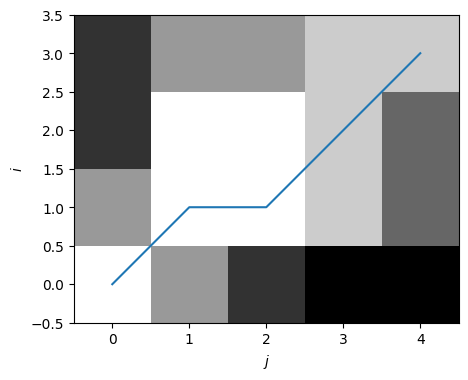

In [11]:
plt.figure(figsize=(6,4))
plt.imshow(cost_mat, cmap=plt.cm.binary, interpolation="nearest", origin="lower")
x_path, y_path = zip(*path)
plt.plot(y_path,x_path)
plt.xlabel("$j$")
plt.ylabel("$i$");

In [12]:
x = np.array([0, -0.5, 1, 1, 0, 0, -1, 0, 0.5, 0, 1])
y = np.array([0, 0, 1, -0.5, -1, 1, 0, 0, 0, -1, -0.5, 0, 0.5])

In [14]:
cost_mat, path, cost, norm_cost = dtw(x,y)

print(f"Alignment cost: {round(cost,2)}")
print(f"Normalized Alignment cost: {round(norm_cost,4)}")

Alignment cost: 3.0
Normalized Alignment cost: 0.125


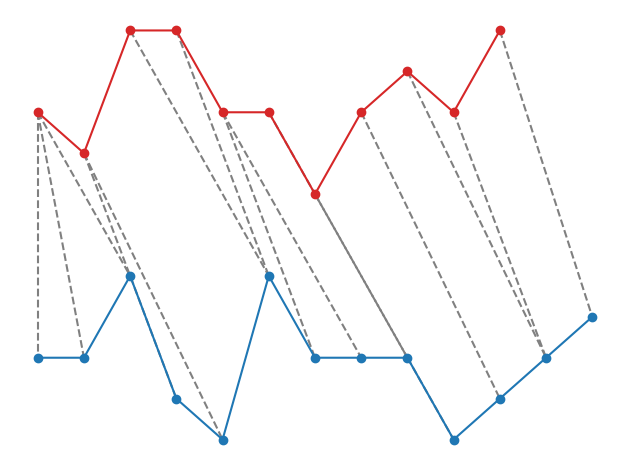

In [15]:
fig, ax = plt.subplots()

for x_i, y_j in path:
    ax.plot([x_i,y_j], [x[x_i] + 1.5, y[y_j] - 1.5], color="gray", ls='--')
ax.plot(np.arange(x.shape[0]), x + 1.5, "-o", c="C3")
ax.plot(np.arange(y.shape[0]), y - 1.5, "-o", c="C0")

plt.axis("off")
plt.tight_layout()

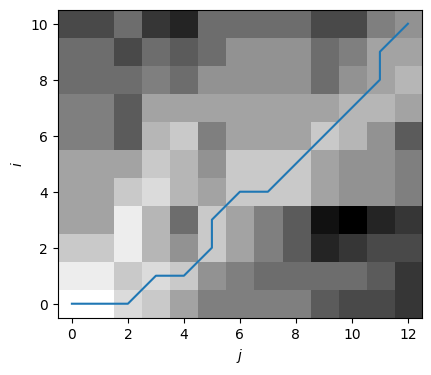

In [16]:
plt.figure(figsize=(6,4))
plt.imshow(cost_mat, cmap=plt.cm.binary, interpolation="nearest", origin="lower")
x_path, y_path = zip(*path)
plt.plot(y_path,x_path)
plt.xlabel("$j$")
plt.ylabel("$i$");

In [17]:
#Actual Data

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

from sktime.datasets import load_basic_motions

X_train,y_train = load_basic_motions(split='train', return_type='numpy3D')
X_test,y_test = load_basic_motions(split='test', return_type='numpy3D')

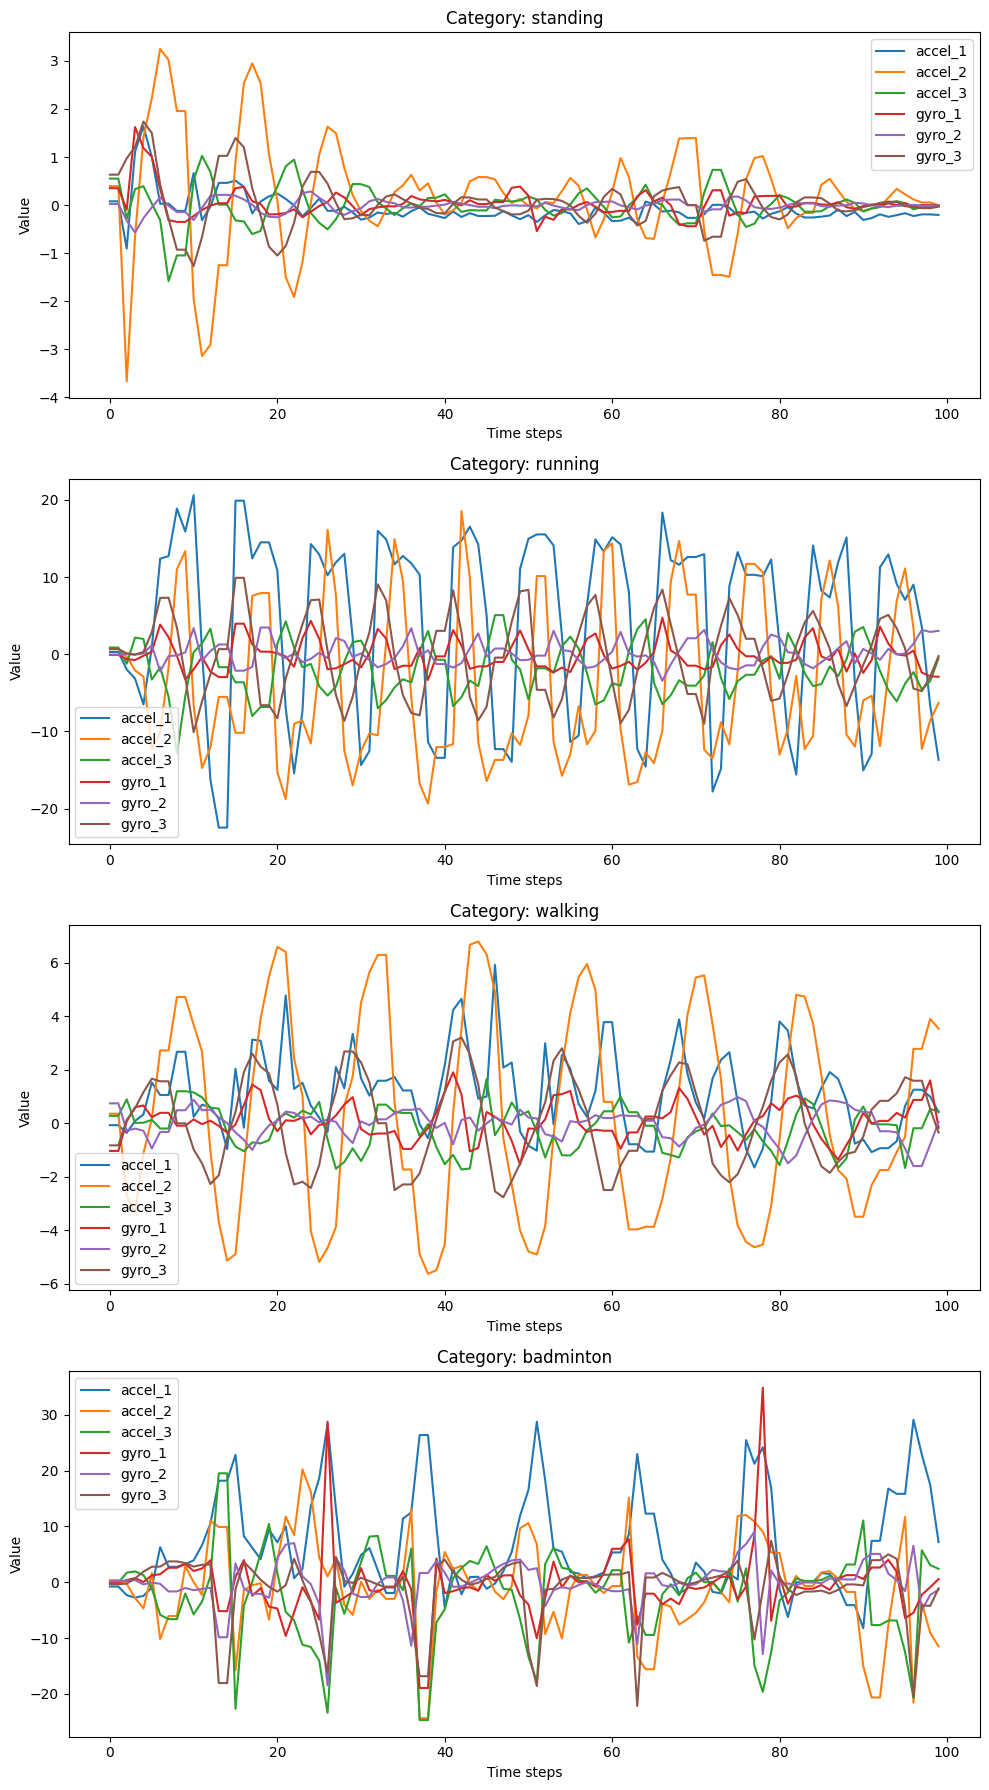

In [19]:
series_indices = [0, 10, 20, 30]
categories = ['standing','running','walking','badminton']
features = ['accel_1','accel_2','accel_3','gyro_1','gyro_2','gyro_3']

selected_series = X_train[series_indices]

fig,axes = plt.subplots(4,1,figsize=(10,18))

for i in range(4):
    for j in range(selected_series.shape[1]): # # of features/series
        axes[i].plot(selected_series[i,j], label=features[j])

    axes[i].set_title(f'Category: {categories[i]}')
    axes[i].set_xlabel('Time steps')
    axes[i].set_ylabel('Value')
    axes[i].legend()

plt.tight_layout()

In [20]:
# Get 2 samples of accel_1 for standing
# Get 2 sampes of accel_1 for walking

stand_1 = X_train[0, 0:1, :50].squeeze()
stand_2 = X_train[1, 0:1, :50].squeeze()
walk_1 = X_train[20, 0:1, :50].squeeze()

In [21]:
cost_mat, path, cost, norm_cost = dtw(stand_1, stand_2)

print(f"Alignment cost: {round(cost,2)}")
print(f"Normalized Alignment cost: {round(norm_cost,4)}")

Alignment cost: 17.33
Normalized Alignment cost: 0.1733


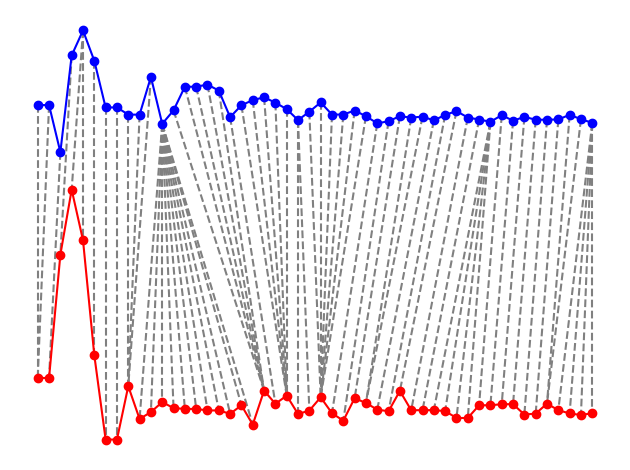

In [25]:
fig, ax = plt.subplots()

for x_i,y_j in path:
    ax.plot([x_i, y_j], [stand_1[x_i] + 3, stand_2[y_j] - 3], color="gray", ls='--')
ax.plot(np.arange(stand_1.shape[0]), stand_1 + 3, "-o", color="blue")
ax.plot(np.arange(stand_2.shape[0]), stand_2 - 3, "-o", color="red")

plt.axis("off")
plt.tight_layout()

In [26]:
cost_mat, path, cost, norm_cost = dtw(stand_1, walk_1)

print(f"Alignment cost: {round(cost,2)}")
print(f"Normalized Alignment cost: {round(norm_cost,4)}")

Alignment cost: 56.68
Normalized Alignment cost: 0.5668


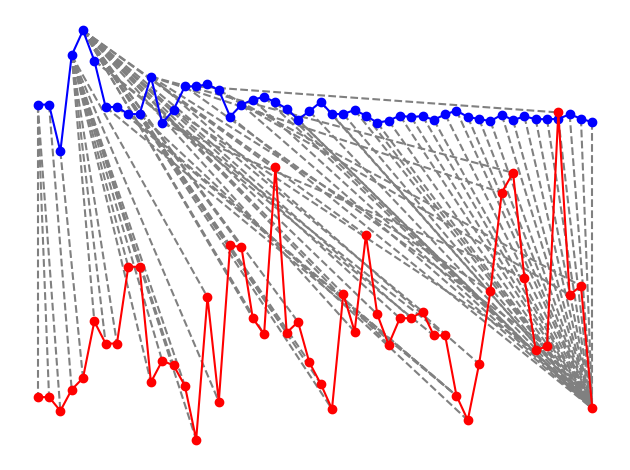

In [27]:
fig, ax = plt.subplots()

for x_i,y_j in path:
    ax.plot([x_i, y_j], [stand_1[x_i] + 3, walk_1[y_j] - 3], color="gray", ls='--')
ax.plot(np.arange(stand_1.shape[0]), stand_1 + 3, "-o", color="blue")
ax.plot(np.arange(walk_1.shape[0]), walk_1 - 3, "-o", color="red")

plt.axis("off")
plt.tight_layout()